In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as Tree

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=",")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
X_val=df.iloc[:,:-1].values
Y_val=df.iloc[:,-1].values
X_val[0:15]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368],
       [47, 'F', 'LOW', 'HIGH', 11.767],
       [34, 'F', 'HIGH', 'NORMAL', 19.199],
       [43, 'M', 'LOW', 'HIGH', 15.376],
       [74, 'F', 'LOW', 'HIGH', 20.942],
       [50, 'F', 'NORMAL', 'HIGH', 12.703]], dtype=object)

In [4]:
Y_val[0:6]

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX'], dtype=object)

In [5]:
from sklearn import preprocessing

In [6]:
l_sex=preprocessing.LabelEncoder()
l_sex.fit(["F","M"])
X_val[:,1]=l_sex.transform(X_val[:,1])
l_bp=preprocessing.LabelEncoder()
l_bp.fit(["HIGH","LOW","NORMAL"])
X_val[:,2]=l_bp.transform(X_val[:,2])
l_chloresterol=preprocessing.LabelEncoder()
l_chloresterol.fit(["HIGH","NORMAL"])
X_val[:,3]=l_chloresterol.transform(X_val[:,3])

In [7]:
X_val[0:6]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607]], dtype=object)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_val,Y_val,test_size=0.3,random_state=3)

In [9]:
print('Shape of X training set {}'.format(X_train.shape),'&',' Size of Y training set {}'.format(y_train.shape))
print('Shape of X training set {}'.format(X_test.shape),'&',' Size of Y training set {}'.format(y_test.shape))

Shape of X training set (140, 5) &  Size of Y training set (140,)
Shape of X training set (60, 5) &  Size of Y training set (60,)


In [10]:
drugTree=DecisionTreeClassifier(criterion="entropy", max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [12]:
DrugPredTree=drugTree.predict(X_test)
print("Predicted Values--")
print(DrugPredTree[0:5])
print("Actual Values--")
print(y_test[0:5])

Predicted Values--
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
Actual Values--
['drugY' 'drugX' 'drugX' 'drugX' 'drugX']


In [13]:
from sklearn import metrics
print("Accuracy Score: ",metrics.accuracy_score(y_test,DrugPredTree))

Accuracy Score:  0.9833333333333333


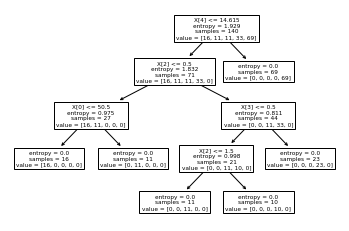

In [14]:
Tree.plot_tree(drugTree)
plt.show()

In [15]:
#accuracy values are almost mear to 1. If it would have been one, the data would have been overfitted. This was observed while taking the test size as 0.2